## Travaux pratiques - 


Avant tout, on commence par rajouter quelques bibliothèques qui peuvent manquer dans l'installation


In [48]:
%%sh
sudo pip3 install pandas matplotlib seaborn sklearn

## Introduction à Python :


In [1]:
print('mon premier programme python')
for i in [0, 1, 2]:
    print("valeur :", i)
print("Fin")

mon premier programme python
valeur : 0
valeur : 1
valeur : 2
Fin


In [2]:
for i in range(3):
    print("valeur :", i)
print("Fin")

valeur : 0
valeur : 1
valeur : 2
Fin


In [3]:
# addition
a = 4 + 5
a

9

In [4]:
#multiplication
2*5

10

In [5]:
#puissance
2**5

32

In [6]:
import numpy as np

x = np.arange(-6, 6, 0.3)


#### Définir une fonction :  la fonction linéaire par exemple

C'est une fonction simple de la forme: f(x) = ax ou f(x) = x. En gros, l'entrée passe à la sortie sans une très grande modification ou alors sans aucune modification. 

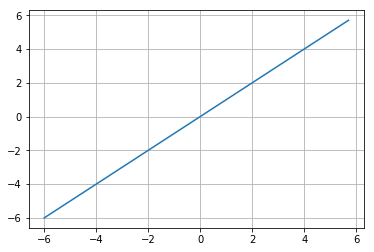

In [8]:
import matplotlib.pyplot as plt # pour afficher la figure

def linear(x):
    a = []
    for item in x:
        a.append(item)
    return a

y = linear(x)

plt.plot(x,y)
plt.grid()
plt.show()

## TP1 : Introduction à la fouille de données (Data mining)

L’objectif de cette séance de travaux pratiques est de montrer l’utilisation des méthodes de fouille de données pour les problèmes de classification et de régression en python. 

Ce document reprend librement certains exemples montrés dans l’excellente documentation de Scikit-Learn.

### 1. La classification supervisée : 
C’est l’opération qui permet de placer chaque individu de la population dans une classe parmi l’ensemble des classes préétablies, en suivant un processus d’apprentissage supervisé. 
le choix de la classe d’un individu dépend de ses caractéristiques.

- Algorithme KPPV (K Nearest Neighbors)
- Réseau de neurones
- Arbre de décision
- Classification naïve bayésienne 
- Machine à vecteurs de support (SVM)
- ...

### Problématique:
#### Données :
- Une liste d’individus X {1..n} caractérisée par un ensemble d’attributs P. 
- Un ensemble C de classes préétablies.   
- Les caractéristiques du nouvel individu «indiv».
#### Question :
-  Quelle est la classe appropriée à «indiv» ?


### Jeu de données :
Le jeu de données Iris a été utilisé à l''article classique de Fisher, publié en 1936, intitulé "L'utilisation de plusieurs mesures dans des problèmes taxonomiques", est également disponible dans le référentiel UCI Machine Learning.

Il comprend trois espèces d’iris de 50 échantillons chacune, ainsi que des propriétés propres à chaque fleur. Une espèce de fleur est séparable linéairement des deux autres, mais les deux autres ne sont pas séparables linéairement l'une de l'autre.

Les colonnes de cet ensemble de données sont:

     Id
     Longueur du Sépale Cm
     Largeur du Sépale Cm
     Longueur du Pétale cm
     Largeur du Pétale Cm
     Espèce : classe : Iris Setosa, Iris Versicolor ou Iris Virginica.

Un échantillon : (4.9,3.6,1.4,0.1, “Iris-setosa”)

### A. importation des librairies
Avec Pandas on peut manipuler lire (et/ou écrire) nos jeux de données, généralement avec une extension .csv

In [23]:
%%sh
sudo pip3 install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=312b8d2eb3e004e04d44de889eb465be27ecf644a6893f60096f58c9fbada07d
  Stored in directory: /root/.cache/pip/wheels/9e/ec/a6/33cdb5605b0b150074213e154792654a1006e6e6807dc7ca6f
Successfully built sklearn


In [11]:
# importation des lib 

import pandas as pd


### B. Importation des données
Avec la fonction read_csv de Pandas: on peut mettre dans notre dataframe le contenu du fichier csv, en indiquant comme paramètre (1: le chemin ou la source où se trouve le fichier csv, 2: les séparateurs entre les valeurs dans notre cas ces des vergules) en troisième position, un paramètre facultatif pour spécifier le type d'encodage de notre fichier exemple encoding ="UTF8".

In [14]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### QUESTION 1
Quelle est la moyenne de la longueure des petales de la setosa ?

### Reponse 1

In [15]:
# Il y a plein de manière d'écrire cette commande
rep = df[df["Species"]=='Iris-setosa'].PetalLengthCm.mean()

#df[df.Outcome==1].SkinThickness.mean()
#df[df["Outcome"]==1]["SkinThickness"].mean()

rep

1.464

### C. Statistiques descriptives élémentaires
Lire les informations sur nos données (Types d'attributs, valeurs manquantes...) Pandas nous permet de voir les informations sur notre benchmark exemple: avec dataframe.info() il nous affiche tout les attributs de notre fichier avec le type de donnée et le nombre de valeurs de chaque colonne
dataframe.columns permet de citer les noms de toutes les colonnes

In [16]:
df.info() #donner les infos de notre data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB



On peut supprimer la colonne ID :

df.drop('Id',axis=1,inplace=True) 

#dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe



### D. préparation des données
Dans cette étape nous déterminons les attributs choisis pour l'entrainement et nous définissons l'attribut "classe" de notre benchmark

In [17]:
# définir les attraibuts qui nous intéréssent 
df_features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]

In [18]:
# définir l'attribut classe
df_labels = df[['Species']]

Si on veut schématiser la distribution de nos classes, il suffit de faire appel à la libraire seaborn, en suite définir l'attribut concerné

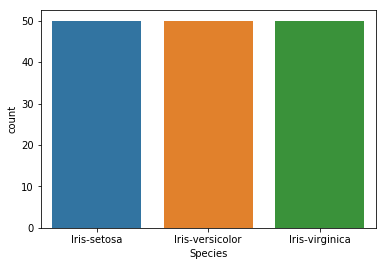

In [21]:
import seaborn as sns
# schématiser la distribution des classes
sns.countplot(df['Species'])

### E. Transformer la colonne des classes en labels numériques

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[['Species']] = le.fit_transform(df[['Species']])
df_labels = df[['Species']]

## F. Diviser le dataset en données d'entrainement et données de teste
Ceci est réalisable avec sklearn qui permet de prendre aléatoirement des données de teste à partir du benchmark et laisser le reste pour l'apprentissage.
La fonction train_test_split(param1,param2,param3,param4) prends 4 paramétres:
le premier dédié à l'ensemble d'entrainement, le deuxième à l'ensemble de teste, le troisième c'est le paramètre du % de l'ensemble de test (généralement entre 15 et 40%), 

le 4 ème paramétre (facultatif) pour spécifier quel type de fonction random utiliser:
si vous utilisez random_state = some_number, vous pouvez garantir que la sortie de Run 1 sera égale à la sortie de Run 2, c'est-à-dire que votre split sera toujours le même. Peu importe ce que le nombre réel random_state est 42, 0, 21, ... L'important est que chaque fois que vous utilisez 42, vous obtiendrez toujours la même sortie la première fois que vous faites la division. Ceci est utile si vous voulez des résultats reproductibles, par exemple dans la documentation, afin que tout le monde puisse toujours voir les mêmes nombres lors de l'exécution des exemples.

Cette fonction retourne 4 sorties: 
La 1ere est le sous-ensembles aléatoires d'entrainement 
La 2éme est le vecteur de leurs labels (leurs classes).
La 3ème est le sous-ensemble aléatoire pour le teste.
La 4ème est le vecteur de leurs labels (leurs classes).



In [26]:
from sklearn.model_selection import train_test_split
#decouper le data set en 30% pour test et 70% pour train
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.4, random_state=42)

.shape permet de savoir la dimension d'un ensemble.
Par exemple ici l'ensemble d'entrainement est composé de 105000 lignes et 9 colonnes. 

In [27]:
print('x_train shape:', X_train.shape) # .shape permet de voir la
print('x_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (90, 4)
x_test shape: (60, 4)
y_train shape: (90, 1)
y_test shape: (60, 1)


In [28]:
X_train.shape[0]

90

### Méthode des K plus proches Voisins ( K nearest neigbors)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,accuracy_score

In [31]:


mon_knn = KNeighborsClassifier(n_neighbors=5)
#fitting

mon_knn.fit(X_train, y_train)#.values.ravel())
#ypred
ypred = mon_knn.predict(X_test)

print ('KNN Uniform accuracy score')

print (accuracy_score(y_test, ypred))

KNN Uniform accuracy score
0.9833333333333333


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


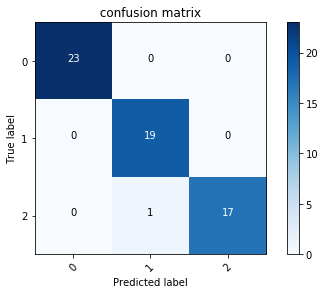

In [32]:
# Function to plot confusion matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False,  title=' confusion matrix ', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = mon_knn.predict(X_test)
# Convert predictions classes to one hot vectors 
#Y_pred_classes = np.argmax(Y_pred , axis = 1) 
# Convert validation observations to one hot vectors
Y_true = y_test#np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3)) 

### Méthode des arbres de décision

In [33]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [34]:
iris.data.shape

(150, 4)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

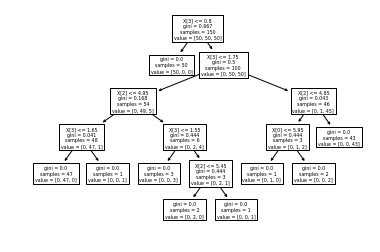

In [35]:
 tree.plot_tree(clf.fit(iris.data, iris.target)) 

In [36]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
iris = load_iris()
X = iris['data']
y = iris['target']
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3)
decision_tree = decision_tree.fit(X, y)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [37]:
clf.predict(iris.data[:1, :])

array([0])

In [38]:
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

In [39]:

clf = tree.DecisionTreeClassifier(max_depth=1,min_samples_leaf=6)
clf = clf.fit(X_train, y_train)

In [40]:
ypred = clf.predict(X_test)

print ('Tree accuracy score')

print (accuracy_score(y_test, ypred))

Tree accuracy score
0.6833333333333333


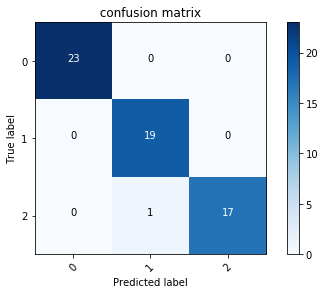

In [41]:
confusion_mtx = confusion_matrix(Y_true, Y_pred)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3)) 

In [42]:
confusion_mtx

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 17]])

### Exercice 1 :
En se basant sur ce notebook :
- Ajouter un code qui cherche les meilleurs paramètres pour chaque méthode. ( vous pouvez utiliser gridsearch)
- Ajouter d'autre méthodes de classification à ce notebook ( exmple: Naive Bayes, SVM, Random Forest, ... etc)
- Evaluer toutes vos méthodes par validation croisée (nbr de paquet = 5).
- Afficher un tableau comparatif des méthodes utlisées avec les résultats obtenus.

### Exercice 2 : Challenge 1 : PRÉDICTION DE DIABÈTE  

Pour réaliser ce programme, vous pouvez utiliser en local sur vos machines l'environnement _Jupyter Notebook_ distribué par _anaconda_ https://www.anaconda.com/distribution/

L’objectif fondamental est de prédire si oui ou non un patient est atteint du diabète à partir de certains attributs : âge, nombre de grossesses, taux d’insuline, etc.  

_NB : la compétence à utiliser le langage Python n'est pas l'objectif de ce travail, même s'il va certainement vous permettre d'évoluer dans ce domaine. Nous vous conseillons la documentation officielle https://www.python.org/ et en particulier la description de sa syntaxe. Vous pouvez aisément connaître la version exécutée par votre plateforme grâce à la commande `print (sys.version)`_


En se basant sur ce notebook :
- Refaire les memes étapes sur le dataset : prédiction du diabète (dont la description est ci-dessous)
- Ajouter un code qui cherche les meilleurs paramètres pour chaque méthode. ( vous pouvez utiliser gridsearch)
- Ajouter d'autre méthodes de classification à ce notebook ( exmple: Naive Bayes, SVM, Random Forest, ... etc)
- Evaluer toutes vos méthodes par validation croisée (nbr de paquet = 5).
- Afficher un tableau comparatif des méthodes utlisées avec les résultats obtenus.
- Bonus : Celui qui obtient le meilleur taux d'accuracy en validation croisée gagne (+1 point).
 



Cet ensemble de données provient d’une extraction fournie par un Institut du diabète. Pour vous faciliter la munipulation, la base de données est disponible sur `M2/diabetes_2.csv`
L'objectif de cet ensemble est de construire un outil permettant de réaliser un diagnostic positif ou négatif de la présence d'un diabète chez un patient. Plusieurs contraintes ont été placées sur la sélection de ces instances dans la base de données d'origine (bien plus volumineuse). En particulier, tous les patients ici sont des femmes âgées d'au moins 21 ans.

Les ensembles de données comprennent plusieurs variables prédictives médicales et la variable cible « Outcome » dont la valeur 1 signifie que la patiente est diabétique et la valeur 0 qu'il ne l'est pas.
Les variables prédictives comprennent le nombre de grossesses que le patient a eues, son IMC, son taux d'insuline, son âge, etc.

Chaque ligne représente un patient et les colonnes sont :

    - Grossesses : nombre de fois où la patiente a déjà été enceinte
    - Glucose : concentration en glucose plasmatique 2 heures dans un test de tolérance au glucose par voie orale
    - BloodPressure : pression artérielle diastolique (mm Hg)
    - SkinThickness : épaisseur du pli cutané des triceps (mm)
    - Insuline : insuline sérique de 2 heures (mu U / ml)
    - IMC : indice de masse corporelle (poids en kg / (taille en m) ^ 2)
    - DiabetesPedigreeFunction : Fonction pédigrée du diabète
    - Age : age (ans)
    - Outcome : Variable cible dont les états sont soit 1 (diabète), soit 0 (non diabète).
